In [80]:
import sklearn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
import missingno as msno
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
lateral_df=pd.read_excel(r"/Users/williambray/Data/All_CI_Merged_keep_cols_imputed_().xlsx")

In [53]:
Unilateral.to_excel('UnilateralCI_all(1).xlsx', index=True)

In [104]:
def unilateral_switch(df):
    non_ear_specific_columns = [
    'Age',
    'NoiseExp',
    'NoiseExpYrs',
    'HearingAidUse',
    'Prelingual',
    'Vertigo',
    'Imbalance',
    'FamilyHistoryHL',
    ]

# Ear-specific columns
    cand=['CI candidate','CNC candidate','Medicare candidate']
    df.drop(columns=cand)
    ear_specific_columns = [
    col for col in df.columns if col not in non_ear_specific_columns
    ]
    df.columns = [col.replace('Patient Data::Right Years since No HA use','Patient Data::Right Years since No HA Use') for col in df.columns]
    df_left = df.copy()
    df_right = df.copy()
# Remove right-specific columns from df_left and left-specific columns from df_right
    for col in df.columns:
        if col.endswith('_R'):
            df_left.drop(columns=[col], inplace=True)
        elif col.endswith('_L'):
            df_right.drop(columns=[col], inplace=True)
    non_L_names= ['Patient Data::Left Hearing Aid Use','Patient Data::Left Age of Onset', 'Patient Data::Left Years since No HA Use',
                  'L PTA (500, 1K, 2K, 4K)', 'L PTA (500, 1K, 2K)', 'Left Low Freq PTA (250, 500)', 'Left Low Frequency PTA (125, 250, 500)']
    non_R_names= ['Patient Data::Right Hearing Aid Use', 'Patient Data::Right Age of Onset', 'Patient Data::Right Years since No HA Use',
                  'R PTA (500, 1K, 2K, 4K)', 'R PTA (500, 1K, 2K)', 'Right Low Freq PTA (250, 500)', 'Right Low Frequency PTA (125, 250, 500)']
    
    df_left=df_left.drop(columns=non_R_names)
    df_right=df_right.drop(columns=non_L_names)
# Standardize column names
    df_left.columns = [col.replace('_L', '') for col in df_left.columns]
    df_left.columns=[col.replace('Left', '') for col in df_left.columns]
    df_left.columns=[col.replace('L PTA', 'PTA') for col in df_left.columns]
    df_right.columns = [col.replace('_R', '') for col in df_right.columns]
    df_right.columns=[col.replace('Right','') for col in df_right.columns]
    df_right.columns=[col.replace('R PTA', 'PTA') for col in df_right.columns]
#     df_left.drop(columns=non_L_names)
#     df_right.drop(columns=non_R_names)
# Add a column to indicate the ear
    df_left['Ear'] = 'Left'
    df_right['Ear'] = 'Right'
# Merge the two dataframes
    df = pd.concat([df_left, df_right], ignore_index=True)
    df=df.drop(columns='Medicare candidate')
    return df
    
Unilateral=unilateral_switch(lateral_df)
Unilateral_df=prepare_dataset(Unilateral)


/var/folders/98/1tsk1jcx4vv6x21fv06tr0j40000gn/T/ipykernel_13871/2424670831.py:65: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['AzBio10SNR']<=60)|(df['AzBioQuiet']<= 60),'CI candidate']=True
/var/folders/98/1tsk1jcx4vv6x21fv06tr0j40000gn/T/ipykernel_13871/2424670831.py:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['CNC']<=40),'CNC candidate']=True


In [106]:
Unilateral_df.to_excel('etiology_Unilateral_df_All(2).xlsx',index=False)

In [102]:
def prepare_dataset(df):
    df=cleaning(df)
    df=etiology_clean(df)
    #df=Etiology_Piccirillo(df)
    return df

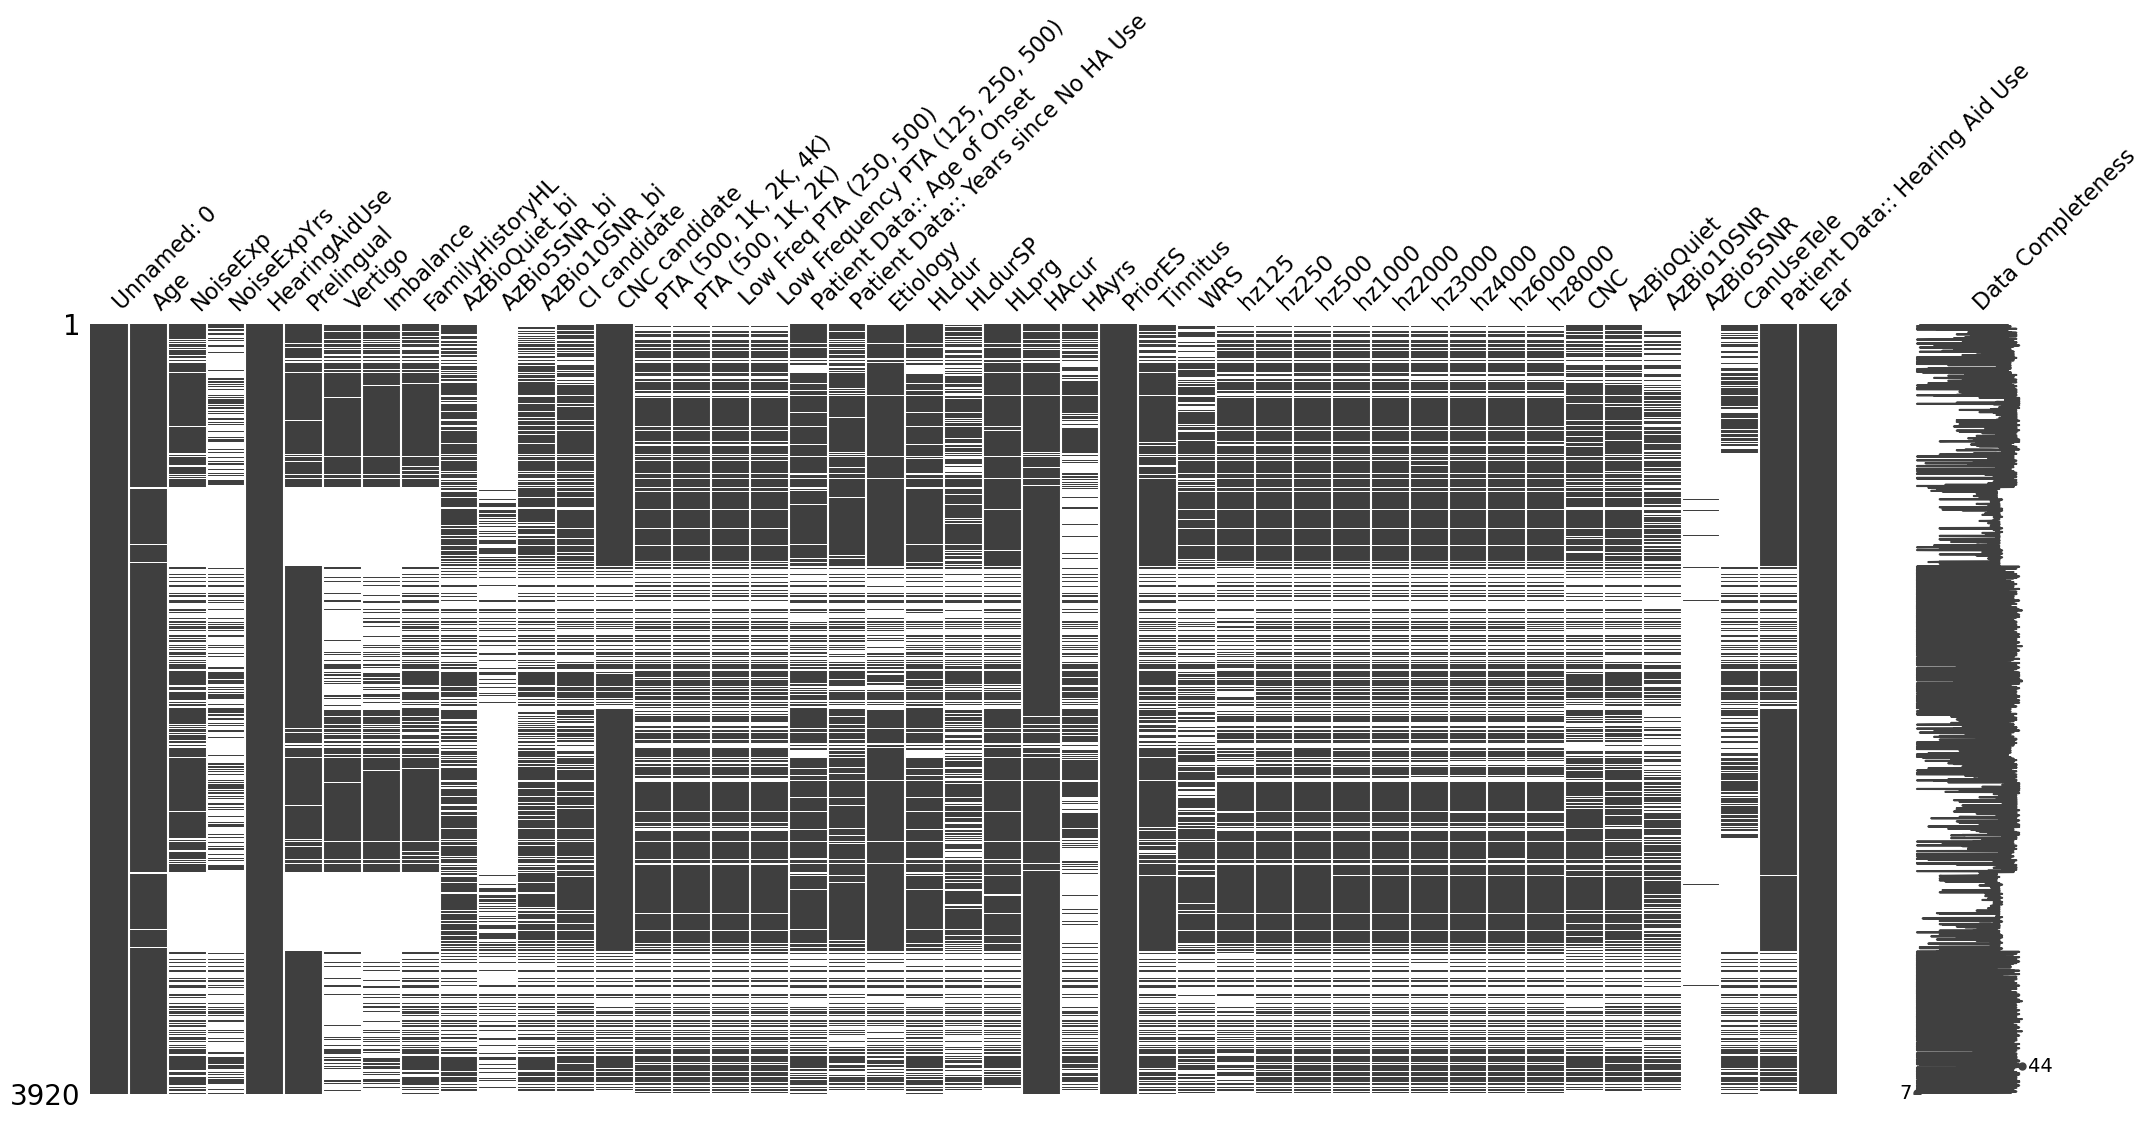

In [105]:
msno.matrix(Unilateral_df,labels=True)
plt.show()

In [69]:
Unilateral['CI candidate'].describe()

count    2870.000000
mean        0.414634
std         0.492745
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CI candidate, dtype: float64

In [98]:
cat_col1=[
    'Etiology',
    'Etiology',
    'HLprg',
    'HLprg'
]
num_col1=[
    'Age',
    'NoiseExpYrs',
 #   'CNC_bi',#100
 #####wordscore   'AzBioQuiet_bi',#100
 #   'AzBio5SNR_bi',#100
 #####wordscore    'AzBio10SNR_bi',
   # 'MOCA',
    'PTA (500, 1K, 2K, 4K)',#125
    'PTA (500, 1K, 2K)',#125
    ' Low Freq PTA (250, 500)',#125
    ' Low Frequency PTA (125, 250, 500)',#125
    'Patient Data:: Age of Onset',#
    'Patient Data:: Years since No HA Use',
    'HLdur',#
    'HLdurSP',#
    'HAyrs',#  deal with -0.1 value, ask Dr. Shew
    'WRS',#
    'hz125',#125
    'hz250',
    'hz500',
    'hz1000',
    'hz2000',
    'hz3000',
    'hz4000',
    'hz6000',
    'hz8000',
 #####wordscore    'CNC_L',#100
  #####wordscore   'CNC_R',#100
  #####wordscore   'AzBioQuiet_L',#100
   #####wordscore  'AzBioQuiet_R',#100
   #####wordscore  'AzBio10SNR_L',#100
   #####wordscore  'AzBio10SNR_R',#100
 #   'AzBio5SNR_L',#100
 #   'AzBio5SNR_R',
]
binary_col1=[
    'NoiseExp',
#    'NoiseExpYrs',
    'HearingAidUse',
    'Prelingual',
    'Vertigo',
    'Imbalance',
    'FamilyHistoryHL',
    'HAcur',
    'HAcur',
    'Tinnitus',
    'CanUseTele',
    'Patient Data:: Hearing Aid Use',
    'PriorES'
    ]
#if imputing values-- remove 99 placeholder as np.nan for now
def cleaning(df):
    for col in num_col1:
        df[col]=df[col].replace(99,np.nan)
    for col in binary_col1:
        df[col]=df[col].replace(99,np.nan)
    df['CI candidate']=np.nan
    df.loc[(df['AzBio10SNR']<=60)|(df['AzBioQuiet']<= 60),'CI candidate']=True
    df.loc[(df['AzBio10SNR']>60)|(df['AzBioQuiet'] > 60),'CI candidate']=False
    df.loc[(df['CNC']<=40),'CNC candidate']=True
    df.loc[(df['CNC']>40),'CNC candidate']=False
    binary_dict={'Yes':1, 'No':0, True:1,False:0}
    df['CI candidate']=df['CI candidate'].replace(binary_dict)
    df['CNC candidate']=df['CNC candidate'].replace(binary_dict)
    df['HLprg']=df['HLprg'].replace('Progressive/Gradual','Gradual')
    return df
def etiology_clean(df):
    df['HLprg']=df['HLprg'].replace('Progressive/Gradual','Gradual')
    df['HLprg']=df['HLprg'].replace('Progressive / Gradual','Gradual')
    df['Etiology']=df['Etiology'].replace('Congenital Congenital Progressive','Congenital Progressive')
    df['Etiology']=df['Etiology'].replace('Menieres',"Meniere's Disease")
    df['Etiology']=df['Etiology'].replace('SSNHL',"Sudden Hearing Loss")
    df['Etiology']=df['Etiology'].replace('NoiseExposure',"Noise Exposure")
    df['Etiology']=df['Etiology'].replace('Acoustic Trauma','Trauma')
    df['Etiology']=df['Etiology'].replace('Presbycusis\nAcoustic Trauma\nOther\nNoise Exposure','Presbycusis\nTrauma\nOther\nNoise Exposure')
    df['Etiology']=df['Etiology'].replace( 'Skull Base Tumor / Lesion (other than Acoustic Neuroma)\nAcoustic Trauma','Skull Base Tumor / Lesion (other than Acoustic Neuroma)\nTrauma')
    df['Etiology']=df['Etiology'].replace('Acoustic Trauma\nSudden Hearing Loss','Trauma\nSudden Hearing Loss')
    df['Etiology']=df['Etiology'].replace('Presbycusis\nNoise Exposure\nAcoustic Trauma\nOther','Presbycusis\nNoise Exposure\nTrauma\nOther')
    df['Etiology']=df['Etiology'].replace('Congenital Prematurity','Congenital')
    df['Etiology']=df['Etiology'].replace('Congenital Progressive','Congenital')
    df['Etiology']=df['Etiology'].replace('Congenital\nCongenital Progressive','Congenital')
    df['Etiology']=df['Etiology'].replace('Congenital\nCongenital','Congenital')
    df['Etiology']=df['Etiology'].replace('Congenital Progressive\nNoise Exposure','Congenital\nNoise Exposure')
    df['Etiology']=df['Etiology'].replace('Presbycusis\nCongenital Progressive\nNoise Exposure','Presbycusis\nCongenital\nNoise Exposure')
    replace_dict_etiology={'Radiation':'Ototoxic Medication / Radiation', 'Radiation\nGenetic':'Ototoxic Medication / Radiation\nGenetic','Genetic\nRadiation':'Ototoxic Medication / Radiation\nGenetic'}
    df['Etiology']=df['Etiology'].replace(replace_dict_etiology)
    return df
def Etiology_Piccirillo(df):
    values_to_keep = ['Hereditary', 'Congenital', 'Presbycusis', "Meniere's Disease", 'Noise Exposure']
    df = df[df['Etiology'].isin(values_to_keep)]
    return df
